In [102]:
import meteostat
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from meteostat import Point, Daily

In [2]:
alexandra = Point(53.087216437622686, -2.4333814565533727, 0)
albion = Point(52.82194806226075, -1.6268163888795644, 0)
wigan = Point(53.54922921968749, -2.6524554453333713, 0)
wycombe = Point(51.631201857917084, -0.7974532867254229, 0)

In [3]:
def get_temperature(location, date):
    date = datetime.strptime(date, '%Y-%m-%d')

    return Daily(location, date, date).fetch()['tavg'][0]

In [4]:
def get_wind_speed(location, date):
    date = datetime.strptime(date, '%Y-%m-%d')

    return Daily(location, date, date).fetch()['wspd'][0]

In [5]:
def remove_penalties(str):
    if '(' in str:
        return int(str[:-3])
    return int(str)

In [6]:
def get_win_streak(data, record):
    # Returns length of winning streak for current match

    record_index = record.name
    streak = 0

    for i in range(record_index-1, 0, -1):
        if data.iloc[[i]]['Result'].values[0] == 'W':
            streak += 1
        else:
            break

    return streak

In [7]:
def get_not_lose_streak(data, record):
    # Returns length of not losing streak for current match

    record_index = record.name
    streak = 0

    for i in range(record_index-1, 0, -1):
        if data.iloc[[i]]['Result'].values[0] == 'W' or data.iloc[[i]]['Result'].values[0] == 'D':
            streak += 1
        else:
            break

    return streak

In [8]:
def get_last_five_games_goals_for(data, record):
    # Returns number of scored goals in last 5 matches

    record_index = record.name
    scored_goals = 0

    for i in range(record_index-1, record_index-6, -1):
        if i < 0:
            break

        scored_goals += data.iloc[[i]]['GF'].values[0]

    return scored_goals

In [9]:
def get_last_five_games_goals_against(data, record):
    # Returns number of scored goals in last 5 matches

    record_index = record.name
    scored_goals = 0

    for i in range(record_index-1, record_index-6, -1):
        if i < 0:
            break

        scored_goals += data.iloc[[i]]['GA'].values[0]

    return scored_goals

In [10]:
def get_oponent_position():
    # gets league table position of an oponent
    pass

In [11]:
data_wigan = pd.read_csv('wigan.csv')

In [12]:
data_wigan.shape

(54, 17)

In [13]:
data_wigan['Temperature'] = data_wigan['Date'].apply(lambda x: get_temperature(wigan, x))
data_wigan['Wind'] = data_wigan['Date'].apply(lambda x: get_wind_speed(wigan, x))

In [14]:
data_wigan['GA'] = data_wigan['GA'].apply(lambda x: remove_penalties(x))
data_wigan['GF'] = data_wigan['GF'].apply(lambda x: remove_penalties(x))

In [15]:
data_wigan['Win streak'] = data_wigan.apply(lambda x: get_win_streak(data_wigan, x), axis=1)
data_wigan['Not lose streak'] = data_wigan.apply(lambda x: get_not_lose_streak(data_wigan, x), axis=1)

In [16]:
data_wigan['Last 5 games goals for'] = data_wigan.apply(lambda x: get_last_five_games_goals_for(data_wigan, x), axis=1)
data_wigan['Last 5 games goals against'] = data_wigan.apply(lambda x: get_last_five_games_goals_against(data_wigan, x), axis=1)

In [17]:
data_wigan.head(10)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,Temperature,Wind,Win streak,Not lose streak,Last 5 games goals for,Last 5 games goals against
0,2021-08-07,15:00 (16:00),League One,Matchweek 1,Sat,Away,L,1,2,Sunderland,...,4-2-3-1,Robert Madley,Match Report,NaN,15.6,29.3,0,0,0,0
1,2021-08-10,19:45 (20:45),EFL Cup,First round,Tue,Away,D,1,1,Hull City,...,4-2-3-1,Martin Coy,Match Report,Wigan Athletic won on penalty kicks following ...,16.7,13.9,0,0,1,2
2,2021-08-14,15:00 (16:00),League One,Matchweek 2,Sat,Home,W,1,0,Rotherham Utd,...,4-2-3-1,Rob Lewis,Match Report,NaN,15.8,20.1,0,1,2,3
3,2021-08-17,19:45 (20:45),League One,Matchweek 3,Tue,Home,D,1,1,Wycombe,...,4-2-3-1,Anthony Backhouse,Match Report,NaN,15.9,33.1,1,2,3,3
4,2021-08-21,15:00 (16:00),League One,Matchweek 4,Sat,Away,W,2,0,Charlton Ath,...,4-2-3-1,Craig Hicks,Match Report,NaN,17.2,13.7,0,3,4,4
5,2021-08-24,19:45 (20:45),EFL Cup,Second round,Tue,Home,D,0,0,Bolton,...,4-2-3-1,Thomas Bramall,Match Report,Wigan Athletic won on penalty kicks following ...,16.5,11.1,1,4,6,4
6,2021-08-28,15:00 (16:00),League One,Matchweek 5,Sat,Home,W,1,0,Portsmouth,...,4-2-3-1,Chris Sarginson,Match Report,NaN,14.7,11.1,0,5,5,2
7,2021-09-11,15:00 (16:00),League One,Matchweek 7,Sat,Home,W,2,1,Doncaster,...,4-2-3-1,Tom Nield,Match Report,NaN,17.3,17.8,1,6,5,1
8,2021-09-18,15:00 (16:00),League One,Matchweek 8,Sat,Away,W,4,1,Acc'ton Stanley,...,4-2-3-1,Andy Haines,Match Report,NaN,17.4,5.5,2,7,6,2
9,2021-09-21,19:45 (20:45),EFL Cup,Third round,Tue,Home,L,0,2,Sunderland,...,4-2-3-1,Leigh Doughty,Match Report,NaN,16.2,9.0,3,8,9,2


In [26]:
data = pd.read_csv('data.csv')

In [27]:
df = data[data['Venue'] == 'Home']

In [85]:
wigan = df[df['Club'] == 'Wigan Athletic'][['Win streak', 'Attendance']].groupby('Win streak').mean()
wycombe = df[df['Club'] == 'Wycombe Wanderers'][['Win streak', 'Attendance']].groupby('Win streak').mean()
albion = df[df['Club'] == 'Burton Albion'][['Win streak', 'Attendance']].groupby('Win streak').mean()
alexandra = df[df['Club'] == 'Crewe Alexandra'][['Win streak', 'Attendance']].groupby('Win streak').mean()

wigan = pd.DataFrame({'Win Streak': wigan.index, 'Attendance': wigan.values.flatten()})
wycombe = pd.DataFrame({'Win Streak': wycombe.index, 'Attendance': wycombe.values.flatten()})
albion = pd.DataFrame({'Win Streak': albion.index, 'Attendance': albion.values.flatten()})
alexandra = pd.DataFrame({'Win Streak': alexandra.index, 'Attendance': alexandra.values.flatten()})

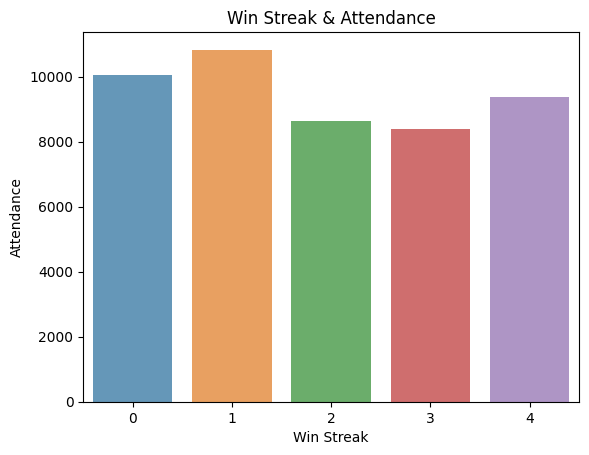

In [121]:
sns.barplot(wigan, x='Win Streak', y='Attendance', alpha=0.75)
plt.title('Win Streak & Attendance')
plt.savefig('graphs/wigan_win_streak.png')

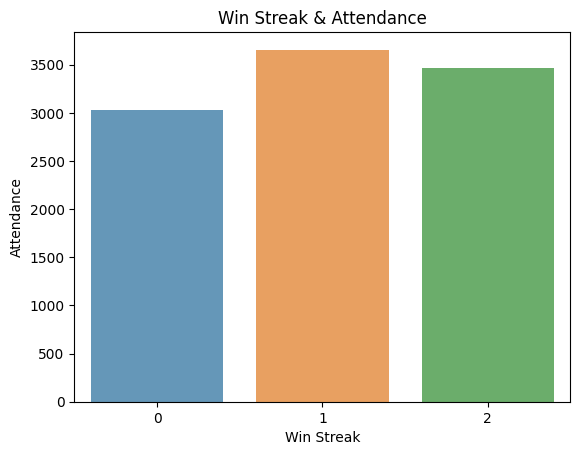

In [122]:
sns.barplot(albion, x='Win Streak', y='Attendance', alpha=0.75)
plt.title('Win Streak & Attendance')
plt.savefig('graphs/albion_win_streak.png')

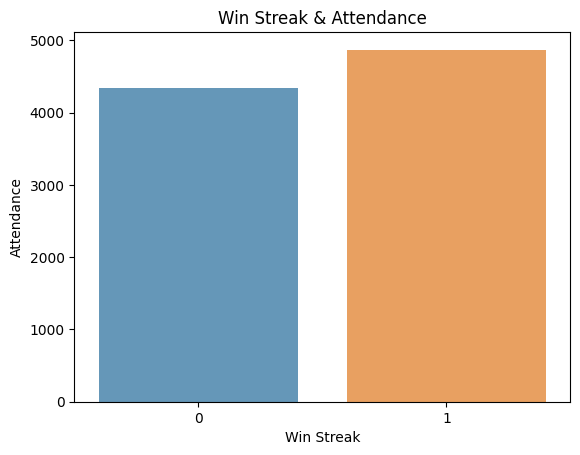

In [123]:
sns.barplot(alexandra, x='Win Streak', y='Attendance', alpha=0.75)
plt.title('Win Streak & Attendance')
plt.savefig('graphs/alexandra_win_streak.png')

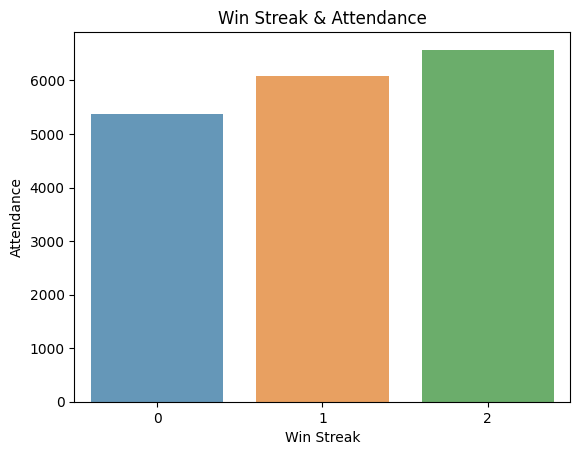

In [126]:
sns.barplot(wycombe, x='Win Streak', y='Attendance', alpha=0.75)
plt.title('Win Streak & Attendance')
plt.savefig('graphs/wycombe_win_streak.png')

In [127]:
df.columns

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'Poss', 'Attendance', 'Captain', 'Formation', 'Referee',
       'Match Report', 'Notes', 'Club', 'Attendance percentage', 'Temperature',
       'Wind', 'Win streak', 'Not lose streak', 'Last 5 games goals for',
       'Last 5 games goals against'],
      dtype='object')

In [128]:
wigan = df[df['Club'] == 'Wigan Athletic'][['Not lose streak', 'Attendance']].groupby('Not lose streak').mean()
wycombe = df[df['Club'] == 'Wycombe Wanderers'][['Not lose streak', 'Attendance']].groupby('Not lose streak').mean()
albion = df[df['Club'] == 'Burton Albion'][['Not lose streak', 'Attendance']].groupby('Not lose streak').mean()
alexandra = df[df['Club'] == 'Crewe Alexandra'][['Not lose streak', 'Attendance']].groupby('Not lose streak').mean()

wigan = pd.DataFrame({'Not lose streak': wigan.index, 'Attendance': wigan.values.flatten()})
wycombe = pd.DataFrame({'Not lose streak': wycombe.index, 'Attendance': wycombe.values.flatten()})
albion = pd.DataFrame({'Not lose streak': albion.index, 'Attendance': albion.values.flatten()})
alexandra = pd.DataFrame({'Not lose streak': alexandra.index, 'Attendance': alexandra.values.flatten()})

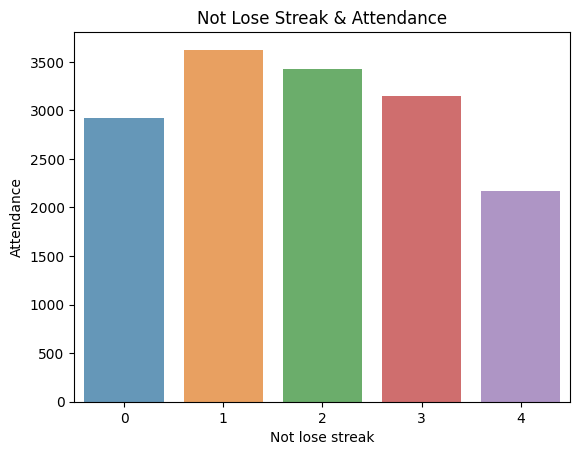

In [132]:
sns.barplot(albion, x='Not lose streak', y='Attendance', alpha=0.75)
plt.title('Not Lose Streak & Attendance')
plt.savefig('graphs/albion_not_lose_streak.png')

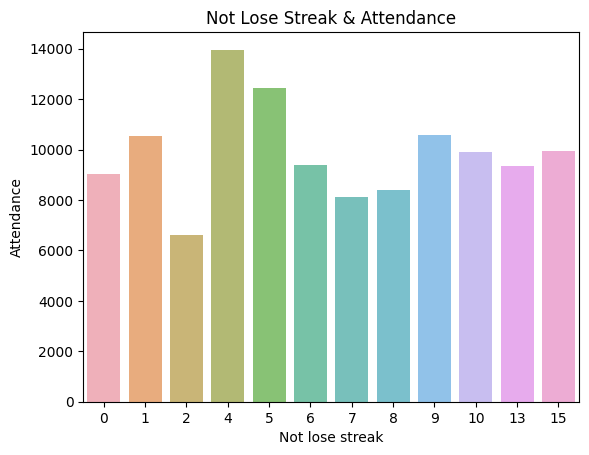

In [133]:
sns.barplot(wigan, x='Not lose streak', y='Attendance', alpha=0.75)
plt.title('Not Lose Streak & Attendance')
plt.savefig('graphs/wigan_not_lose_streak.png')

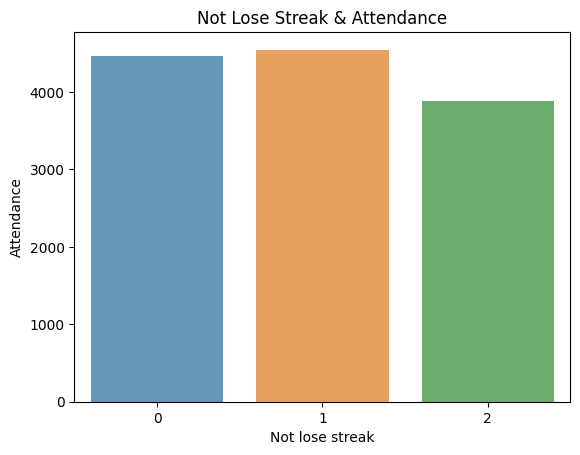

In [134]:
sns.barplot(alexandra, x='Not lose streak', y='Attendance', alpha=0.75)
plt.title('Not Lose Streak & Attendance')
plt.savefig('graphs/alexandra_not_lose_streak.png')

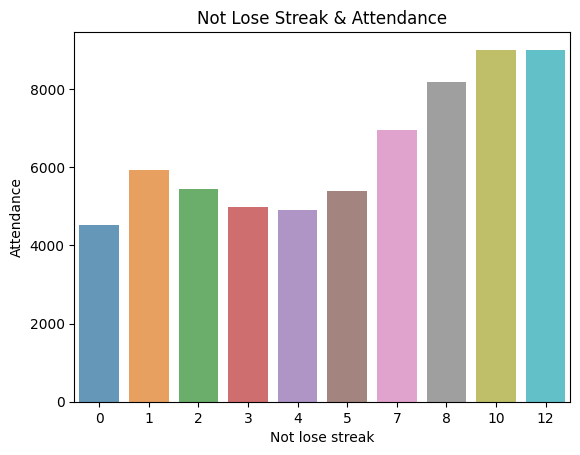

In [135]:
sns.barplot(wycombe, x='Not lose streak', y='Attendance', alpha=0.75)
plt.title('Not Lose Streak & Attendance')
plt.savefig('graphs/wycombe_not_lose_streak.png')

In [136]:
wigan = df[df['Club'] == 'Wigan Athletic'][['Last 5 games goals for', 'Attendance']].groupby('Last 5 games goals for').mean()
wycombe = df[df['Club'] == 'Wycombe Wanderers'][['Last 5 games goals for', 'Attendance']].groupby('Last 5 games goals for').mean()
albion = df[df['Club'] == 'Burton Albion'][['Last 5 games goals for', 'Attendance']].groupby('Last 5 games goals for').mean()
alexandra = df[df['Club'] == 'Crewe Alexandra'][['Last 5 games goals for', 'Attendance']].groupby('Last 5 games goals for').mean()

wigan = pd.DataFrame({'Last 5 games goals for': wigan.index, 'Attendance': wigan.values.flatten()})
wycombe = pd.DataFrame({'Last 5 games goals for': wycombe.index, 'Attendance': wycombe.values.flatten()})
albion = pd.DataFrame({'Last 5 games goals for': albion.index, 'Attendance': albion.values.flatten()})
alexandra = pd.DataFrame({'Last 5 games goals for': alexandra.index, 'Attendance': alexandra.values.flatten()})

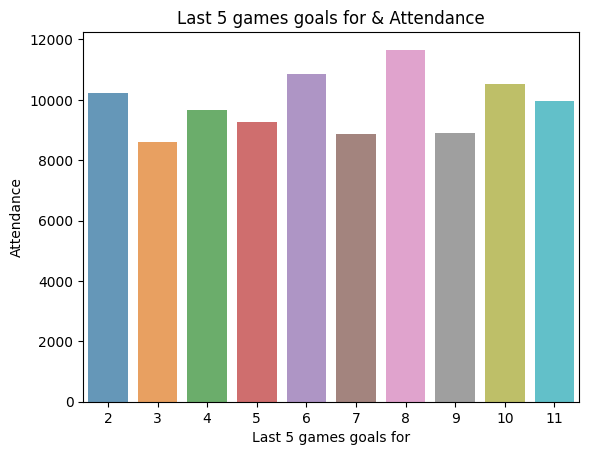

In [137]:
sns.barplot(wigan, x='Last 5 games goals for', y='Attendance', alpha=0.75)
plt.title('Last 5 games goals for & Attendance')
plt.savefig('graphs/wigan_goals_for.png')

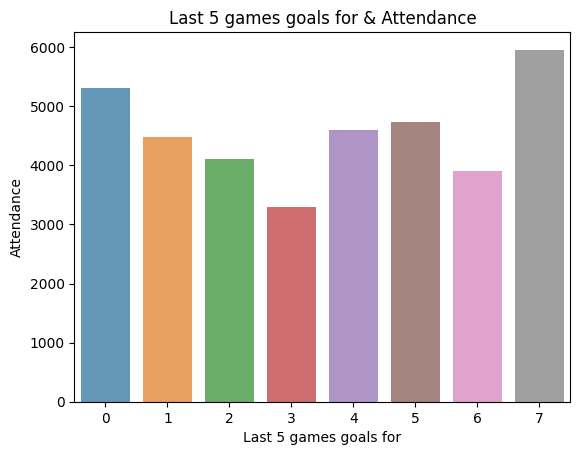

In [138]:
sns.barplot(alexandra, x='Last 5 games goals for', y='Attendance', alpha=0.75)
plt.title('Last 5 games goals for & Attendance')
plt.savefig('graphs/alexandra_goals_for.png')

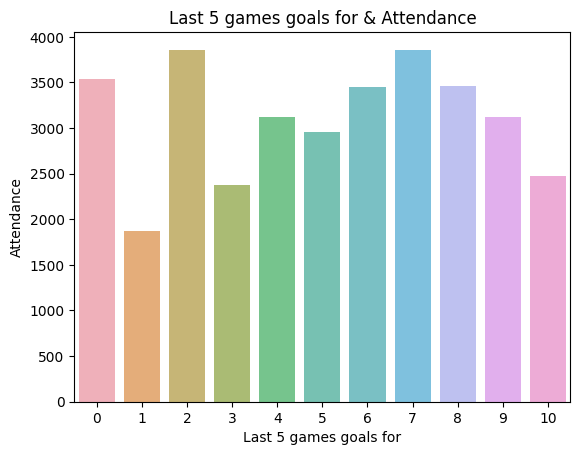

In [139]:
sns.barplot(albion, x='Last 5 games goals for', y='Attendance', alpha=0.75)
plt.title('Last 5 games goals for & Attendance')
plt.savefig('graphs/albion_goals_for.png')

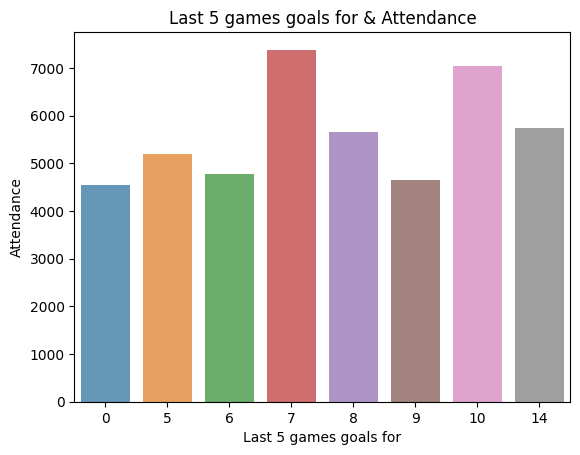

In [140]:
sns.barplot(wycombe, x='Last 5 games goals for', y='Attendance', alpha=0.75)
plt.title('Last 5 games goals for & Attendance')
plt.savefig('graphs/wycombe_goals_for.png')

In [141]:
wigan = df[df['Club'] == 'Wigan Athletic'][['Last 5 games goals against', 'Attendance']].groupby('Last 5 games goals against').mean()
wycombe = df[df['Club'] == 'Wycombe Wanderers'][['Last 5 games goals against', 'Attendance']].groupby('Last 5 games goals against').mean()
albion = df[df['Club'] == 'Burton Albion'][['Last 5 games goals against', 'Attendance']].groupby('Last 5 games goals against').mean()
alexandra = df[df['Club'] == 'Crewe Alexandra'][['Last 5 games goals against', 'Attendance']].groupby('Last 5 games goals against').mean()

wigan = pd.DataFrame({'Last 5 games goals against': wigan.index, 'Attendance': wigan.values.flatten()})
wycombe = pd.DataFrame({'Last 5 games goals against': wycombe.index, 'Attendance': wycombe.values.flatten()})
albion = pd.DataFrame({'Last 5 games goals against': albion.index, 'Attendance': albion.values.flatten()})
alexandra = pd.DataFrame({'Last 5 games goals against': alexandra.index, 'Attendance': alexandra.values.flatten()})

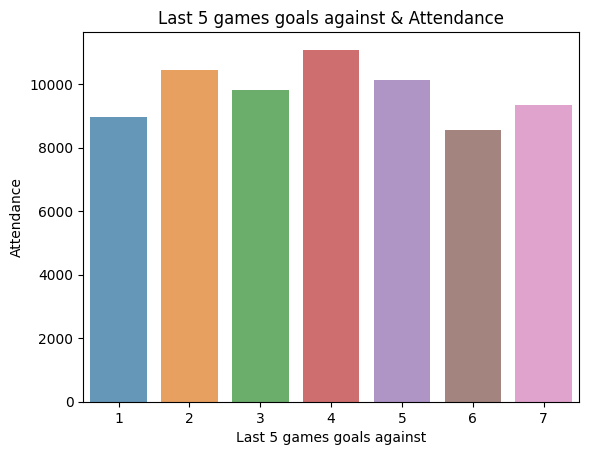

In [142]:
sns.barplot(wigan, x='Last 5 games goals against', y='Attendance', alpha=0.75)
plt.title('Last 5 games goals against & Attendance')
plt.savefig('graphs/wigan_goals_against.png')

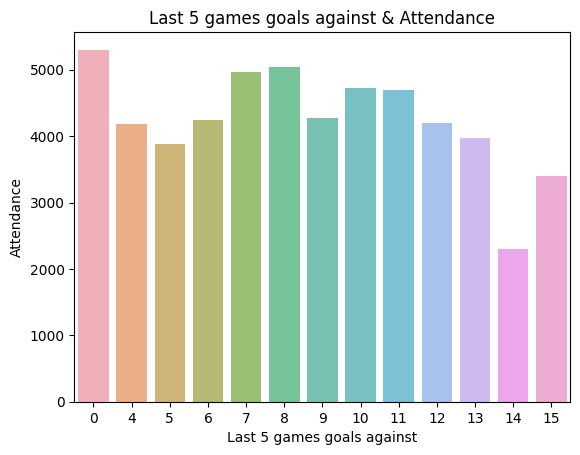

In [143]:
sns.barplot(alexandra, x='Last 5 games goals against', y='Attendance', alpha=0.75)
plt.title('Last 5 games goals against & Attendance')
plt.savefig('graphs/alexandra_goals_against.png')

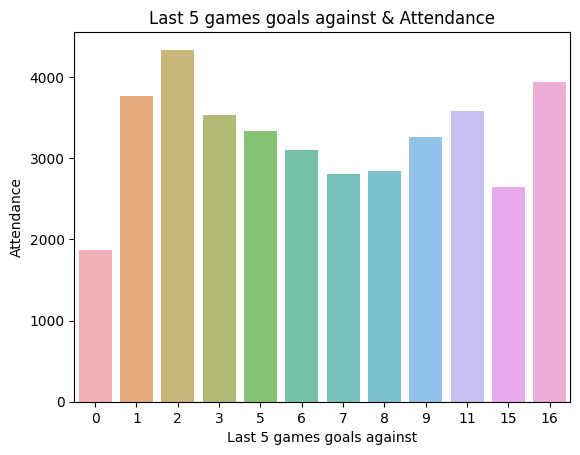

In [144]:
sns.barplot(albion, x='Last 5 games goals against', y='Attendance', alpha=0.75)
plt.title('Last 5 games goals against & Attendance')
plt.savefig('graphs/albion_goals_against.png')

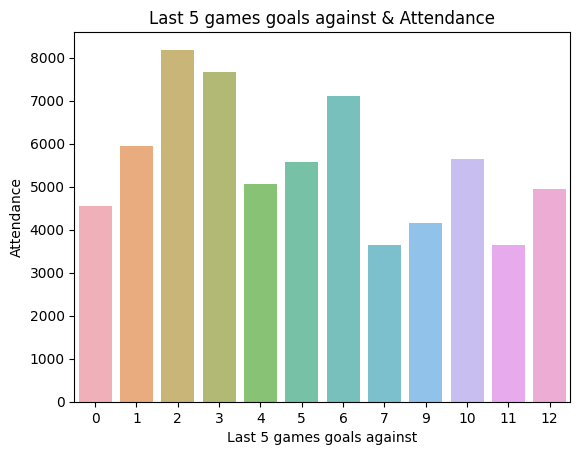

In [145]:
sns.barplot(wycombe, x='Last 5 games goals against', y='Attendance', alpha=0.75)
plt.title('Last 5 games goals against & Attendance')
plt.savefig('graphs/wycombe_goals_against.png')